In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas_datareader
!pip install yfinance

     |████████████████████████████████| 109 kB 6.5 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 6.4 MB 8.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you hav

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
import tensorflow as tf
import pydot_ng as pydot

#import yfinance as yf
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.layers import Dropout, Dense, LSTM
from tensorflow.python.keras import Sequential
from keras.utils.vis_utils import plot_model
import keras 

plt.style.use('fivethirtyeight')

In [ ]:
company = ['AAPL','GOOG','AMZN','XOM','EOG','CVX','CAT','NUE','DHI','GOLD']
start = dt.datetime(1991,1,1)
end = dt.datetime(2021,1,1)
data = []

for c in company :
  df = web.DataReader(c, data_source='yahoo', start='1991-01-01', end='2021-01-01')
  data.append(df)

In [ ]:
company_names = ['Apple','Google','Amazon','Exxon Mobil Corporation','EOG Resources Inc.','Chevron Corporation Caterpillar Inc.','Caterpillar','Nucor Corporation','D R Horton Inc','Gold ']

In [ ]:
company_names[1]

'Google'

In [ ]:
test_data_scaled = []
train_data_scaled = []
scaler_list = []
for i,df in enumerate(data):
  # separate df with close prices and separate train and test data and scale
  close = df.filter(['Close'])
  train_len = math.ceil(len(close)*0.8)
  train_data = close[0:train_len]
  test_data = close[train_len:]
  
  ## comment this later
  '''
  train_data_scaled.append(np.ravel(train_data))
  test_data_scaled.append(np.ravel(test_data))
  '''
  ## 
  
  # scale the train and test data to avoid leakage into test
  scaler = MinMaxScaler(feature_range=(0,1))
  scaled_train = scaler.fit_transform(train_data)
  scaled_test = scaler.transform(test_data)
  
  train_data_scaled.append(np.ravel(scaled_train))
  test_data_scaled.append(np.ravel(scaled_test))

  scaler_list.append(scaler)

In [ ]:
# Train - data Window size is set at 60 and 1 future value is predicted
X_train_data = []
y_train_data = []
for i,df in enumerate(train_data_scaled):
  X_train = []
  y_train = []
  for j in range(60,len(df)):
    x = np.array(df[j-60:j])
    y = np.array(df[j])
    X_train.append(x)
    y_train.append(y)
  X_train_data.append(X_train)
  y_train_data.append(y_train)

# Test - data Window size is set at 60 and 1 future value is predicted 
X_test_data = []
y_test_data = []
for i,df in enumerate(test_data_scaled):
  X_test = []
  y_test = []
  for j in range(60,len(df)):
    x = np.array(df[j-60:j])
    y = np.array(df[j])
    X_test.append(x)
    y_test.append(y)
  X_test_data.append(X_test)
  y_test_data.append(y_test)
for i in range(len(X_train_data)):
  X_train_data[i] = np.array(X_train_data[i])
  X_test_data[i] = np.array(X_test_data[i])
  y_train_data[i] = np.array(y_train_data[i])
  y_test_data[i] = np.array(y_test_data[i])

# reshape the train data

for i in range(len(X_train_data)):
  X_train_data[i] = np.reshape(X_train_data[i], (X_train_data[i].shape[0], X_train_data[i].shape[1],1))
  X_test_data[i] = np.reshape(X_test_data[i], (X_test_data[i].shape[0], X_test_data[i].shape[1],1))

In [ ]:
keras.backend.clear_session()

Epoch 1/20
337/337 [==============================] - 18s 30ms/step - loss: 4.5263e-04 - val_loss: 0.0057
Epoch 2/20
337/337 [==============================] - 9s 28ms/step - loss: 0.0016 - val_loss: 0.0053
Epoch 3/20
337/337 [==============================] - 9s 28ms/step - loss: 0.0014 - val_loss: 0.0059
Epoch 4/20
337/337 [==============================] - 9s 28ms/step - loss: 0.0015 - val_loss: 0.0060
Epoch 5/20
337/337 [==============================] - 9s 28ms/step - loss: 0.0015 - val_loss: 0.0054
Epoch 6/20
337/337 [==============================] - 9s 28ms/step - loss: 0.0015 - val_loss: 0.0052
Epoch 7/20
337/337 [==============================] - 9s 28ms/step - loss: 0.0015 - val_loss: 0.0037
Epoch 8/20
337/337 [==============================] - 9s 28ms/step - loss: 0.0014 - val_loss: 0.0021
Epoch 9/20
337/337 [==============================] - 9s 28ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 10/20
337/337 [==============================] - 9s 28ms/step - loss: 8.9009e-04

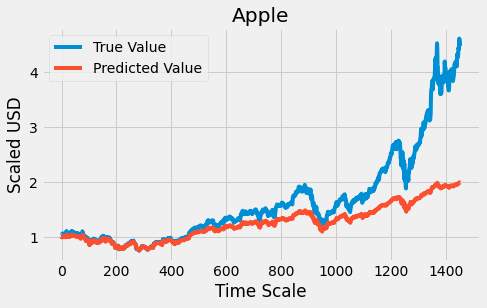

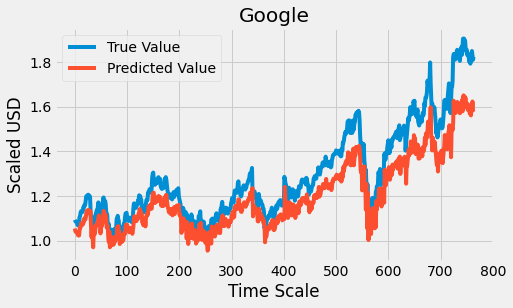

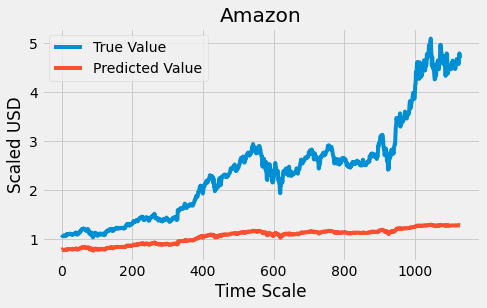

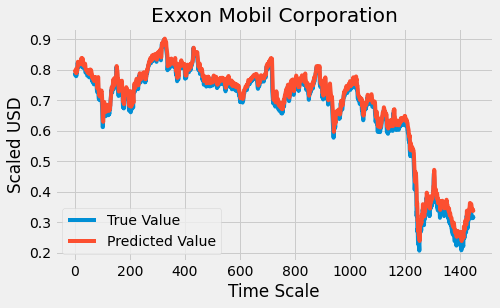

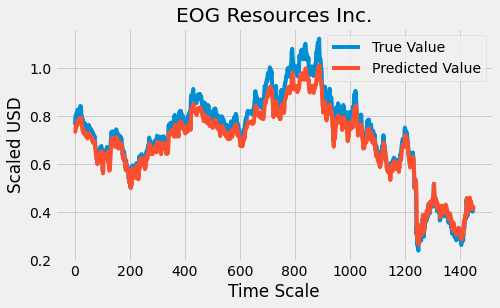

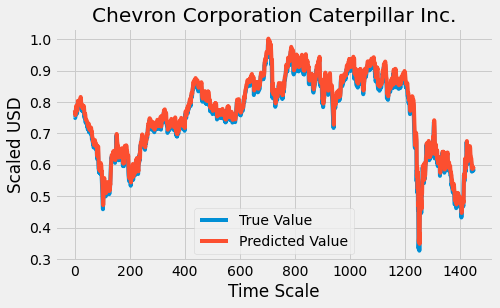

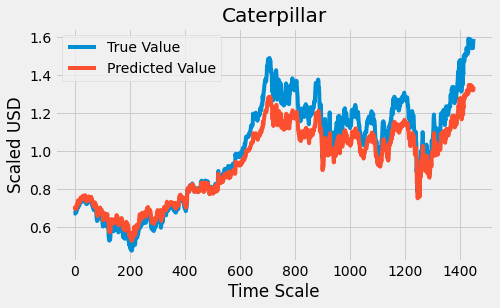

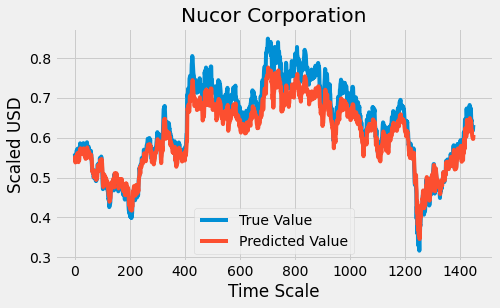

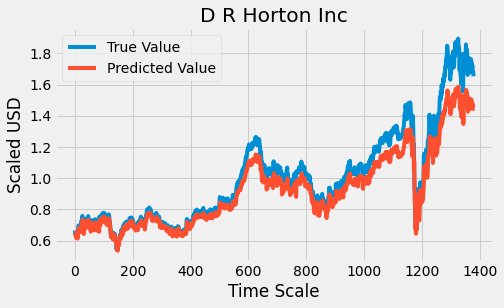

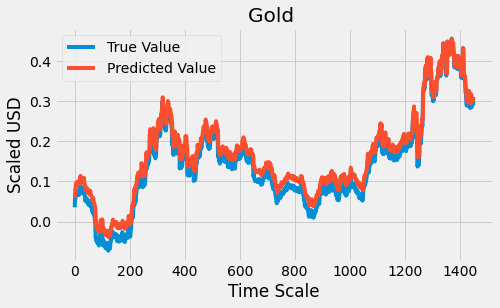

In [ ]:
loss = []
y_preds = []
for i,trainX in enumerate(X_train_data): 
  #Building the LSTM Model
  keras.backend.clear_session()
  '''
  lstm = Sequential()
  lstm.add(LSTM(64, input_shape= (X_train_data[i].shape[1],1), activation='relu', return_sequences=True))
  lstm.add(LSTM(64, return_sequences=False))
  lstm.add(Dense(25))
  lstm.add(Dense(1))
  ''' 
  model=Sequential()
  model.add(tf.keras.layers.GRU(100,return_sequences=True,input_shape=(X_train_data[i].shape[1],1)))
  model.add(tf.keras.layers.GRU(50,return_sequences=False))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error',optimizer='adam')
  
  #model.summary()
  #plot_model(lstm,show_shapes=True, show_layer_names=True)
  #Model Training
  
  history = model.fit(X_train_data[i], y_train_data[i], epochs=20, batch_size=16, verbose=1, shuffle=False, validation_split=0.1)
  y_pred = model.predict(X_test_data[i])
  
  #y_pred = scaler_list[i].inverse_transform(y_pred)
  #_test = scaler_list[i].inverse_transform(y_test_data[i]) 
  y_preds.append(y_pred)
  rmse = np.sqrt(np.mean(y_pred-y_test_data[i])**2) 
  loss.append(rmse)
  print(rmse)

  #Predicted vs True Close Price – LSTM
  plt.figure(figsize=(7,4))
  plt.plot(y_test_data[i], label='True Value')
  plt.plot(y_pred, label='Predicted Value')
  plt.title(company_names[i])
  plt.xlabel('Time Scale')
  plt.ylabel('Scaled USD')
  plt.legend()
plt.show() 
  
keras.backend.clear_session()